UPLOAD LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Load Dataset

In [6]:
df = pd.read_csv("data.csv", encoding='latin1', low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


Selecting Feature & Data Cleaning

In [7]:
# Select NO2 feature
x = df["no2"]

# Remove missing values
x = x.dropna()

# Remove non-physical values
x = x[x >= 0]

x.describe()

count    419509.000000
mean         25.809623
std          18.503086
min           0.000000
25%          14.000000
50%          22.000000
75%          32.200000
max         876.000000
Name: no2, dtype: float64

EDA: Original Distribution

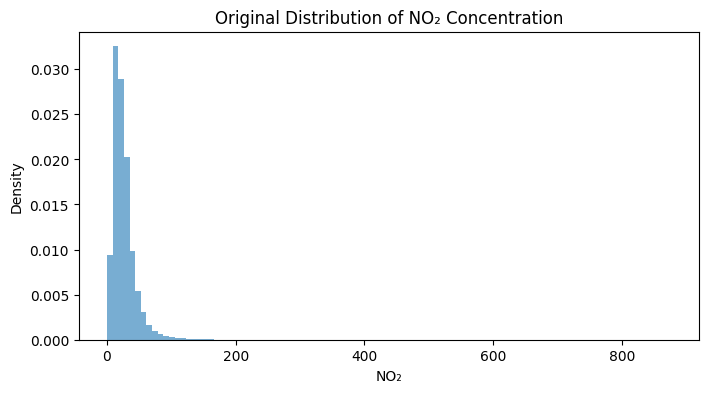

In [8]:
plt.figure(figsize=(8,4))
plt.hist(x, bins=100, density=True, alpha=0.6)
plt.title("Original Distribution of NO₂ Concentration")
plt.xlabel("NO₂")
plt.ylabel("Density")
plt.show()


Roll-Number-Based Transformation

In [9]:
r = 102303705
a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)
a_r, b_r



(0.0, 0.3)

Apply Transformation

In [10]:
z = x + a_r * np.sin(b_r * x)


Distribution After Transformation

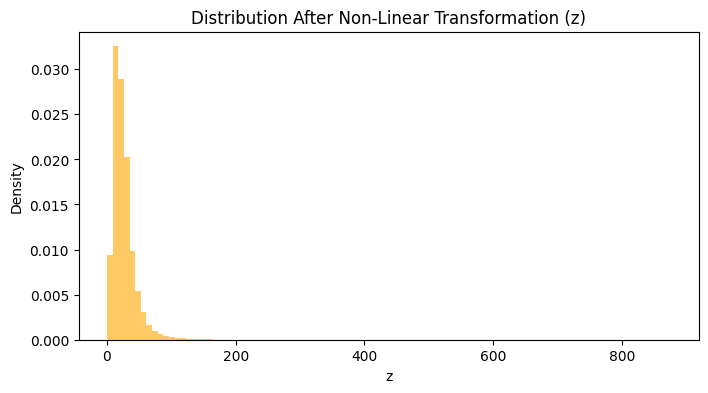

In [11]:
plt.figure(figsize=(8,4))
plt.hist(z, bins=100, density=True, alpha=0.6, color="orange")
plt.title("Distribution After Non-Linear Transformation (z)")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()


In [12]:
mu = np.mean(z)
variance = np.var(z)

lambda_param = 1 / (2 * variance)
c_param = np.sqrt(lambda_param / np.pi)

mu, lambda_param, c_param


(np.float64(25.809622897811263),
 np.float64(0.001460436525489001),
 np.float64(0.021560876239314918))

Visual Validation

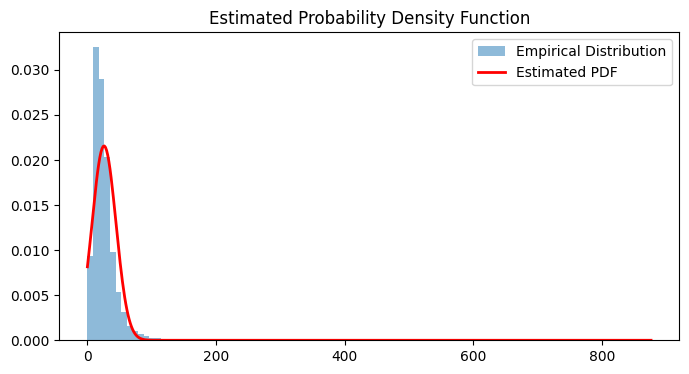

In [13]:
z_range = np.linspace(z.min(), z.max(), 500)
pdf_estimated = c_param * np.exp(-lambda_param * (z_range - mu)**2)

plt.figure(figsize=(8,4))
plt.hist(z, bins=100, density=True, alpha=0.5, label="Empirical Distribution")
plt.plot(z_range, pdf_estimated, 'r', linewidth=2, label="Estimated PDF")
plt.legend()
plt.title("Estimated Probability Density Function")
plt.show()


Final Submission Values


In [14]:
print("μ (mu):", mu)
print("λ (lambda):", lambda_param)
print("c:", c_param)


μ (mu): 25.809622897811263
λ (lambda): 0.001460436525489001
c: 0.021560876239314918


In [15]:
import pandas as pd
import numpy as np

# Transformation parameters calculated from roll number 102303955
r = 102303955
ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

In [17]:
df = pd.read_csv("data.csv", encoding='latin1', low_memory=False)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [20]:
x = df["no2"].dropna()
x = x[x >= 0]
z = x + ar * np.sin(br * x)

In [21]:
# Estimate parameters of p(z) = c * exp(-λ(z-μ)²)

# Parameter 1: μ (mu) - mean of transformed data
mu = np.mean(z)

# Parameter 2: λ (lambda) - precision parameter
# From the PDF form, this is related to variance
variance = np.var(z)
lambda_param = 1 / (2 * variance)

# Parameter 3: c - normalization constant
# Integral constraint: ∫p(z)dz = 1
c_param = np.sqrt(lambda_param / np.pi)

print(f"Estimated Parameters:")
print(f"μ (mu) = {mu:.6f}")
print(f"λ (lambda) = {lambda_param:.6f}")
print(f"c = {c_param:.6f}")

Estimated Parameters:
μ (mu) = 25.801059
λ (lambda) = 0.001460
c = 0.021558
